# Logistic Regression

In [418]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [419]:
# Load Dataset
data = pd.read_csv("churn.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [420]:
# Shape
data.shape

(10000, 14)

In [421]:
# Check Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [422]:
# Checking for null values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [423]:
# Checking for duplicates
data.duplicated().sum()

0

In [424]:
# Removing unnecessary columns
coln_un = data.iloc[:,:3]
data.drop(coln_un, axis = 1, inplace = True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [425]:
print(data["Geography"].unique())
print(data.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [426]:
# Preprocessing The Categorical Columns
cat_cols = data.select_dtypes(include = "object")
cat_dummies = pd.get_dummies(cat_cols, drop_first = True, dtype = "int")
cat_dummies

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [427]:
# Merge the encoded set with the original df (data)
merged_df = pd.concat([data, cat_dummies], axis = 1)
merged_df

# Removing the original columns
merged_df = merged_df.drop(cat_cols, axis = 1)
merged_df

# Converting the column names into lowercase
merged_df.columns = merged_df.columns.str.lower()

In [428]:
# Checking the Target Variable Records
merged_df["exited"].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [364]:
# Separating feature variables from target variable
X = merged_df.drop("exited", axis = 1)
y = merged_df["exited"]

In [365]:
# Dividing the df into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [366]:
# Scaling Features
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [367]:
# ?LogisticRegression

In [368]:
# Create the model
logreg = LogisticRegression(max_iter = 10000)

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [369]:
# train_score
logreg.score(X_train, y_train)

0.787375

In [370]:
# Predictions
y_test_predict = logreg.predict(X_test)

In [371]:
results = {
    "Actual": y_test,
    "Predicted": y_test_predict
}
pd.DataFrame(results)

,Actual,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,1
4521,0,0
...,...,...
6412,1,0
8285,0,0
7853,1,0
1095,1,0


## Classification Metrics

In [372]:
# Checking the model performance
acc_score = accuracy_score(y_test, y_test_predict)
acc_score

0.8005

In [373]:
# Creating Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_predict)
print(conf_matrix)

[[1573   34]
 [ 365   28]]


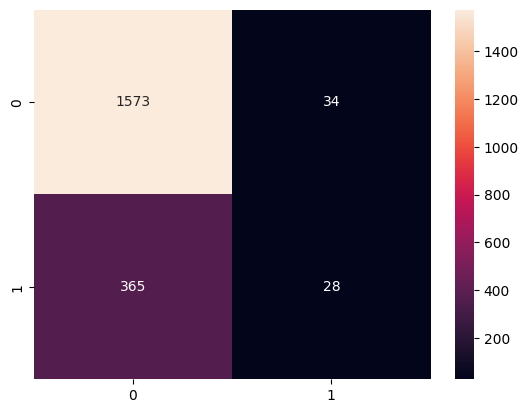

In [374]:
# Visualize Confusion Matrix into a heatmap
sns.heatmap(conf_matrix, annot = True, fmt = ".0f");

In [375]:
# Classification Report
class_report = classification_report(y_test, y_test_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [376]:
# roc_auc_score
roc_auc_score(y_test, y_test_predict)

0.5250446915609349

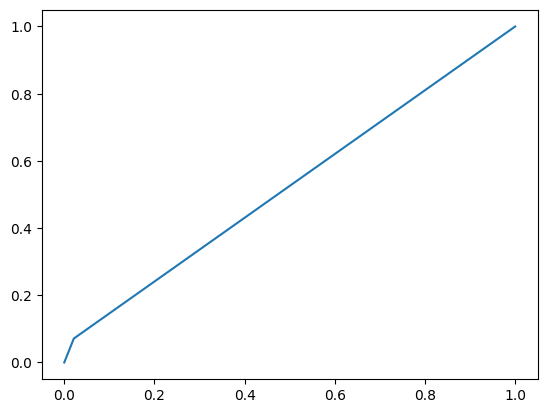

In [377]:
# AUC
fpr,tpr, threshold = roc_curve(y_test, y_test_predict)
plt.plot(fpr, tpr);

## Dealing with Class Imbalanace

In [429]:
# Dataframe to be used
# Checking the labels class records

merged_df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [455]:
# Visualize the label
# Alt: merged_df.groupby("exited")["exited"].count()
exited_proportion = merged_df.exited.value_counts(ascending = False)
exited_proportion

0    7963
1    2037
Name: exited, dtype: int64

In [ ]:
x_s = sm.fit_resample(merged_df("exited"))

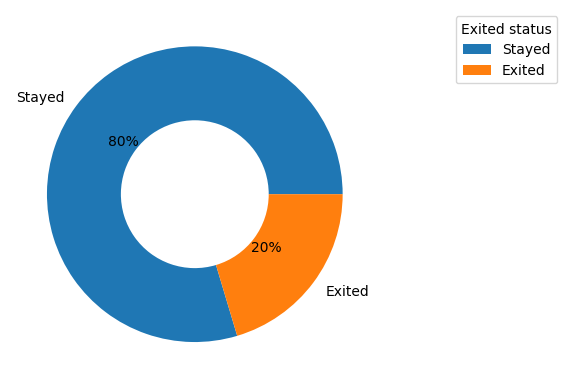

In [431]:
plt.pie(exited_proportion, 
        labels = ["Stayed", "Exited"], 
        autopct = "%.0f%%",
        wedgeprops = dict(width = 0.5)
       )
plt.legend(title = "Exited status", loc = "upper right",  bbox_to_anchor = (1, 0,0.5, 1));

In [432]:
# Separating feature variables from target variable
X = merged_df.drop("exited", axis = 1)
y = merged_df["exited"]

In [433]:
# Dividing the df into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [440]:
# Rectifying class imbalance using SMOTE
# Synthetic Minority Over-sammpling TEchnique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_smoted, y_train_smoted = sm.fit_resample(X_train, y_train)
y_train_smoted.shape, X_train_smoted.shape

((12712,), (12712, 11))

In [443]:
# Fitting the model
model3 = LogisticRegression(max_iter = 10000)
model3.fit(X_train_smoted, y_train_smoted)

LogisticRegression(max_iter=10000)

In [444]:
# Training the model
model3.score(X_train_smoted, y_train_smoted)

0.6706261799874135

In [445]:
# Model Predictions
y_test_pred = model3.predict(X_test)

In [446]:
# Accuarcy Score
accuracy_score = accuracy_score(y_test, y_test_pred)
accuracy_score

0.632

In [450]:
# Confusion matrix
conf_matr = confusion_matrix(y_test, y_test_pred)
conf_matr

array([[997, 610],
       [126, 267]], dtype=int64)

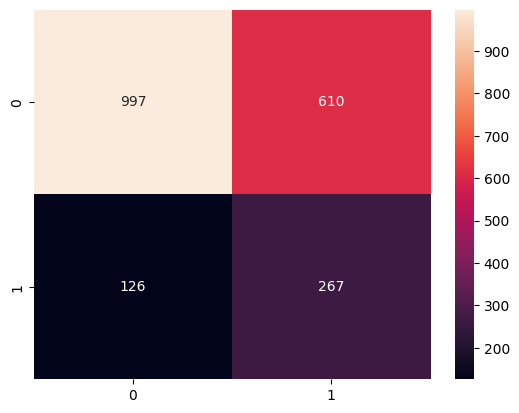

In [451]:
# Visualizing
sns.heatmap(conf_matr, fmt = ".0f", annot = True);

In [454]:
# Classification Report
class_rep = classification_report(y_test, y_test_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1607
           1       0.30      0.68      0.42       393

    accuracy                           0.63      2000
   macro avg       0.60      0.65      0.58      2000
weighted avg       0.77      0.63      0.67      2000

